In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Train head\n", train.head())

print("Test head\n",test.head())

Train head
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [4]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df = pd.concat([train,test])

In [7]:
df.head().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Sex'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Sex, Length: 1309, dtype: bool

In [10]:
df['Age'].isnull().sum()

263

In [11]:
df['Fare'].isnull().sum()

1

In [12]:
df['Embarked'].isnull().sum()

2

In [13]:
df['Cabin'].isnull().sum()

1014

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
### For numeric Data
#1. made histogram to understand distributions, corrplot, pivot_tables
### Categorical Data
#2. Bar charts,pivot tables

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [19]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df_cat = df[['Survived',"Pclass",'Sex','Ticket','Cabin','Embarked']]
df_num = df[['Age','SibSp','Parch',"Fare"]]

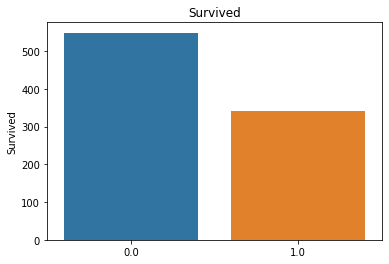

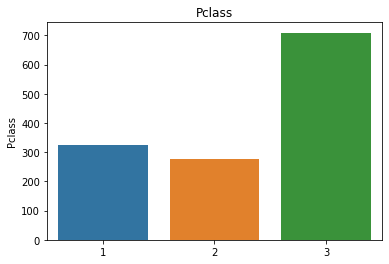

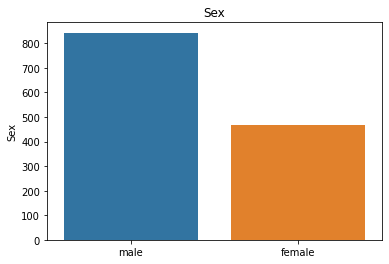

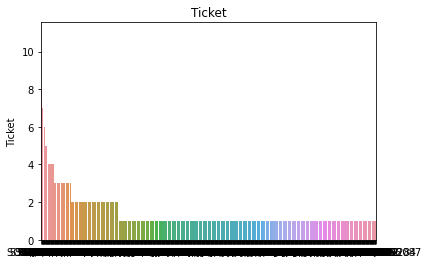

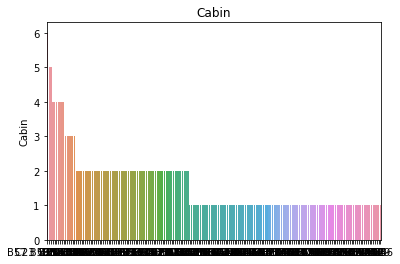

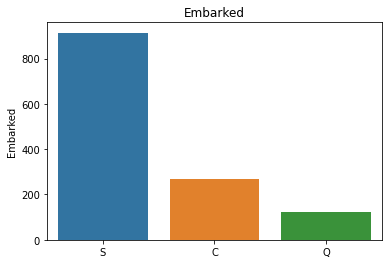

In [21]:
import seaborn as sns
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

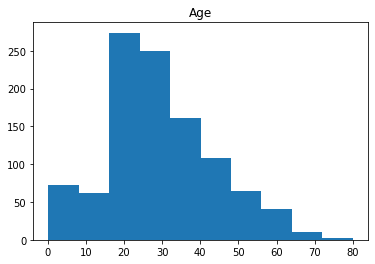

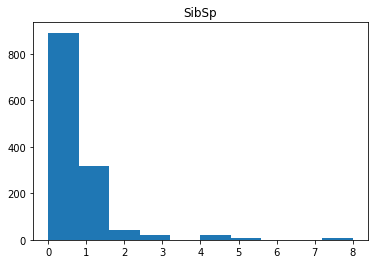

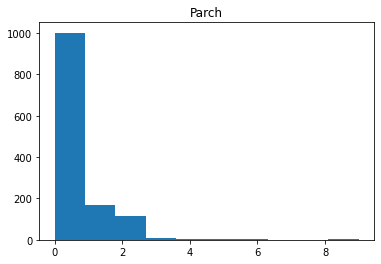

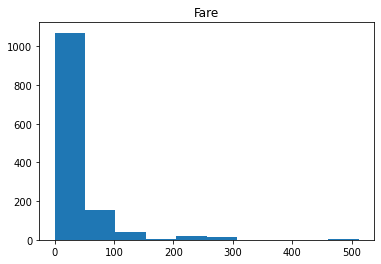

In [22]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


<AxesSubplot:>

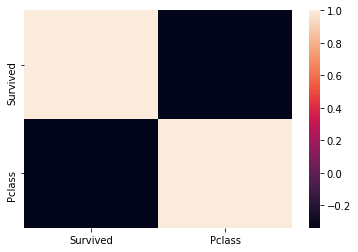

In [23]:
print(df_cat.corr())
sns.heatmap(df_cat.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.243699 -0.150917  0.178740
SibSp -0.243699  1.000000  0.373587  0.160238
Parch -0.150917  0.373587  1.000000  0.221539
Fare   0.178740  0.160238  0.221539  1.000000


<AxesSubplot:>

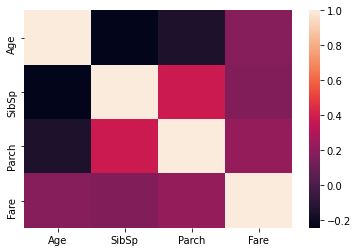

In [24]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [25]:
pd.pivot_table(df,index = 'Survived',values=['Age','SibSp',"Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


In [26]:
print(pd.pivot_table(df,index = "Survived",columns = 'Pclass', values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119


In [27]:
print(pd.pivot_table(df,index = "Survived",columns = 'Sex', values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0.0           81   468
1.0          233   109


In [28]:
print(pd.pivot_table(df,index = "Survived",columns = 'Embarked', values='Ticket',aggfunc='count'))

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


In [29]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
B42                1
A18                1
E63                1
A7                 1
D49                1
Name: Cabin, Length: 186, dtype: int64

In [30]:
df['cabin_multiple']=df.Cabin.apply(lambda x:0 if pd.isna(x)else len(x.split(' ')))

In [31]:
df['cabin_multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [32]:
pd.pivot_table(df,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


In [33]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [34]:
df['cabin_adv'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_adv, dtype: int64

In [35]:
pd.pivot_table(df,index='Survived',columns='cabin_adv',values='Ticket',aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [39]:
#converting Pclass to category
df.Pclass = df.Pclass.astype(str)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [41]:
df['Cabin'].isnull().sum()

1014

In [42]:
df.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
cabin_multiple       0
cabin_adv            0
dtype: int64

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [44]:
#ticket variable understanding for output

df['numeri_Tic'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [57]:
df['tic_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [58]:
df['numeri_Tic'].head()

0    0
1    0
2    0
3    1
4    1
Name: numeri_Tic, dtype: int64

In [59]:
df['numeri_Tic'].value_counts()

1    955
0    352
Name: numeri_Tic, dtype: int64

In [60]:
df['tic_letters'].head()

0        a5
1        pc
2    stono2
3         0
4         0
Name: tic_letters, dtype: object

In [61]:
df['tic_letters'].value_counts()

0            959
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
c              8
soc            8
sopp           7
wep            4
pp             4
scah           4
fc             3
sotono2        3
swpp           2
sca4           2
sc             2
ppp            2
a2             1
sca3           1
aq4            1
sp             1
lp             1
scahbasle      1
sop            1
stonoq         1
fa             1
aq3            1
casoton        1
as             1
scow           1
Name: tic_letters, dtype: int64

In [62]:
pd.pivot_table(df,index='Survived',columns='numeri_Tic', values = 'Ticket', aggfunc='count')

numeri_Tic,0,1
Survived,,
0.0,142,407
1.0,88,252


In [63]:
pd.pivot_table(df,index='Survived',columns='tic_letters', values = 'Ticket', aggfunc='count')

tic_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1.0,253.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [36]:
df.Age = df.Age.fillna(df.Age.median())

In [37]:
df.Fare = df.Fare.fillna(df.Fare.median())

In [38]:
df.dropna(subset=['Embarked'],inplace=True)

In [65]:
#feature engineering on persons title
print(df.Name.head(50))
df['name_title'] =df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [66]:
df['name_title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: name_title, dtype: object

In [67]:
df['name_title'].value_counts()

Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Don               1
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Dona              1
Sir               1
Lady              1
Name: name_title, dtype: int64